Script receives the wout file from VMEC and obtains the Alfvén Continuum using the $\textit{STELLGAP}$ code.
To transform to Boozer coordinates, the library booz_xform (Source: https://pypi.org/project/booz-xform/) is used.

In [1]:
sys.path.append('stellgap_tools/')
from Transform_VMEC_to_Boozer_TK import *
from Continuum_files_TK import *
import matplotlib.pyplot as plt
import os
import shutil

### Variable Declaration 
* $\textbf{device}$: Device name
* $\textbf{profile}$: User preference exit file names
* $\textbf{save_file}$: Folder name to save data
* $\textbf{vmec_file}$: User selec VMEC file
* $\textbf{src_path}$: Folder where stellgap launchers are stored
* $\textbf{dst_file}$: Destination to copy the Stellgap launchers

In [2]:
#variable declaration
device = "TJ-II"
profile = "Exp0"
save_file = f"{device}_{profile}_boozer"
print(f"Save File Name: {save_file}")

if not os.path.exists(save_file):
    os.mkdir(save_file)

Save File Name: TJ-II_Exp0_boozer


## Read Alfven_post and split by toroidal mode

In [3]:
alfven_post = extract_continuum(save_file)
alfven_post

,radius,frequency,m,n_mode
0,0.02000,16122.7200,32,-17
1,0.02000,15501.1200,30,-15
2,0.02000,15371.0500,31,-17
3,0.02000,14751.7900,29,-15
4,0.02000,14648.4200,30,-17
...,...,...,...,...
73403,0.98689,613.5466,7,-12
73404,0.98689,671.6660,10,-16
73405,0.98689,1904.9050,8,-12
73406,0.98689,1447.8770,3,-4


In [ ]:
vmec_file = select_file()
    
src_path = f"../../Stellgap/stellgap/bin/"
dst_path = f"{save_file}/"

surfaces = np.linspace(1,69,69)

In [4]:
b = vmec_to_Boozer(vmec_file,save_file,device,profile,surfaces)

About to try reading VMEC wout file /home/armitage/Documents/Master/TFM/Stellgap_Continuo/wout_files/wout_tj2curref_red.nc
Read ns=71, mpol=12, ntor=18, mnmax=426, mnmax_nyq=426
compute_surfs (0-based indices):  1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
Initializing with mboz=72, nboz=35
ntheta = 290, nzeta = 142, # threads = 6
                   |        outboard (theta=0)      |      inboard (theta=pi)      |
thread js_b js zeta| |B|input  |B|Boozer    Error   | |B|input  |B|Boozer    Error |
------------------------------------------------------------------------------------
   2    24  25   0  8.513e-01  8.513e-01  1.002e-06  1.069e+00  1.069e+00  9.486e-08
                pi  1.059e+00  1.059e+00  1.216e-07  9.241e-01  9.241e-01  1.325e-08
   3    36  37   0  8.348e-01  8.348e-01  4.718e-06  1.107e+00  1.107e+00  3.121e-07
    

In [5]:
b.ns_in

70

<IPython.core.display.Javascript object>


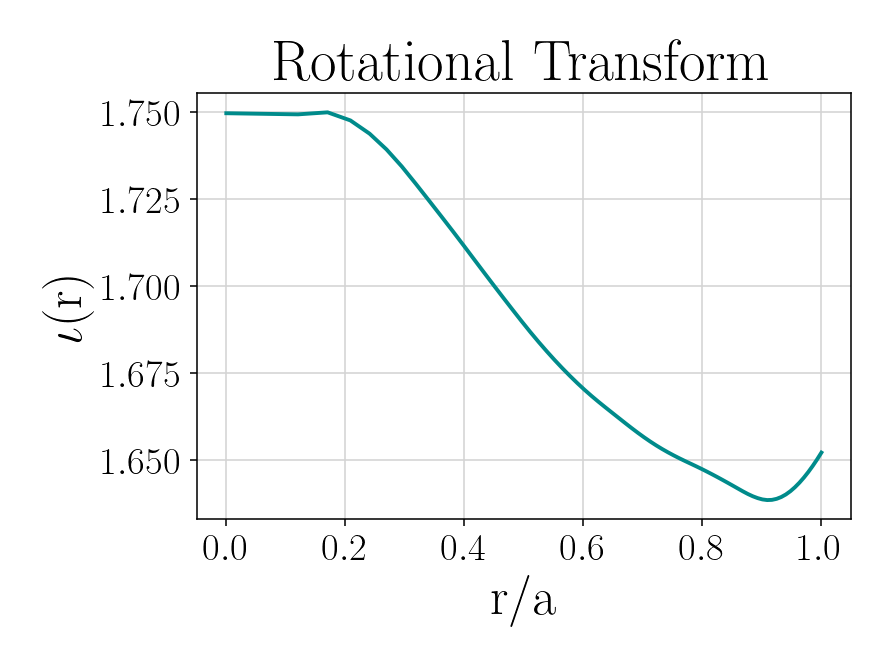

In [5]:
%matplotlib notebook
plot_iota(b,save_file,profile)

<IPython.core.display.Javascript object>


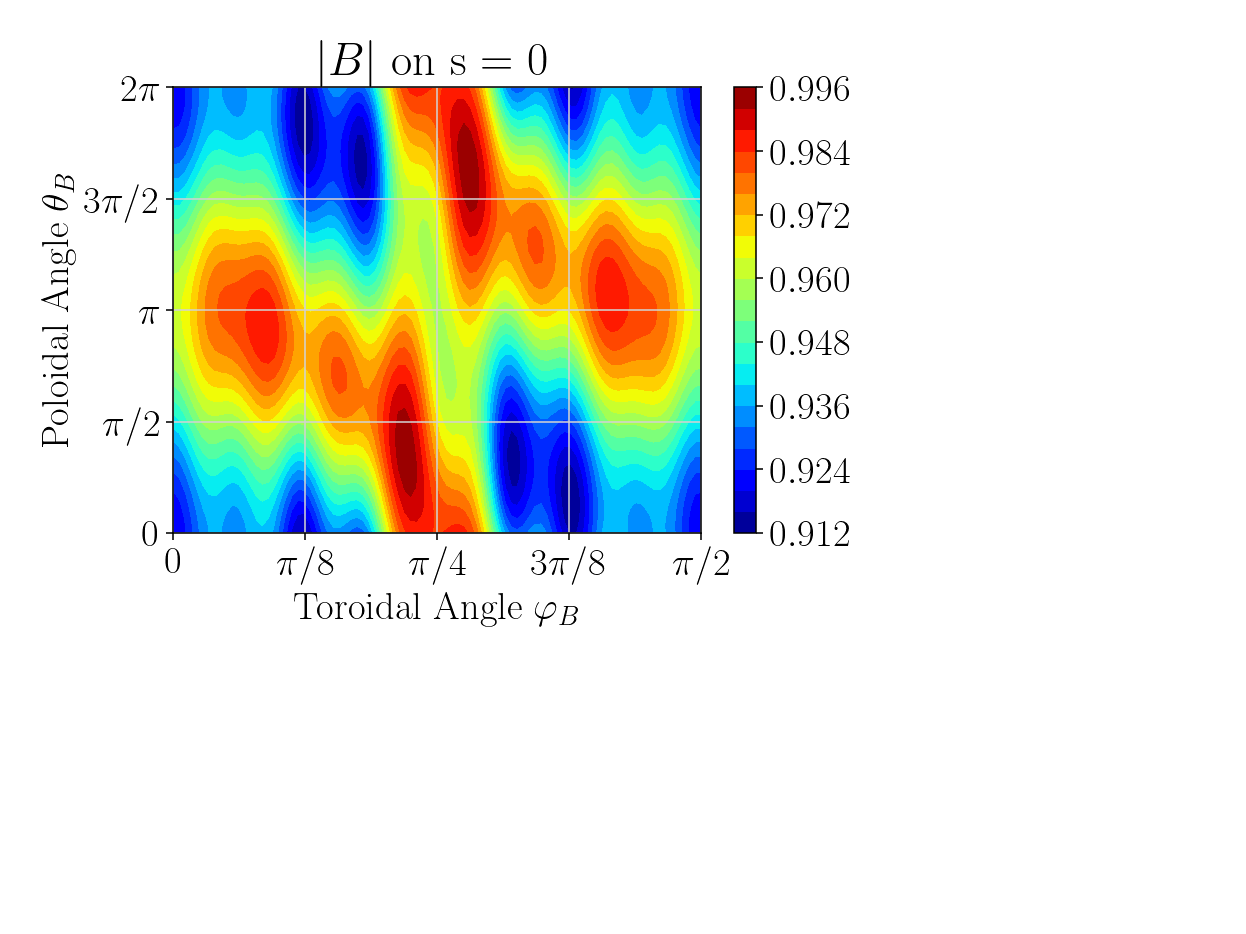

In [5]:
%matplotlib notebook
B_plot(b,0,save_file)

<IPython.core.display.Javascript object>


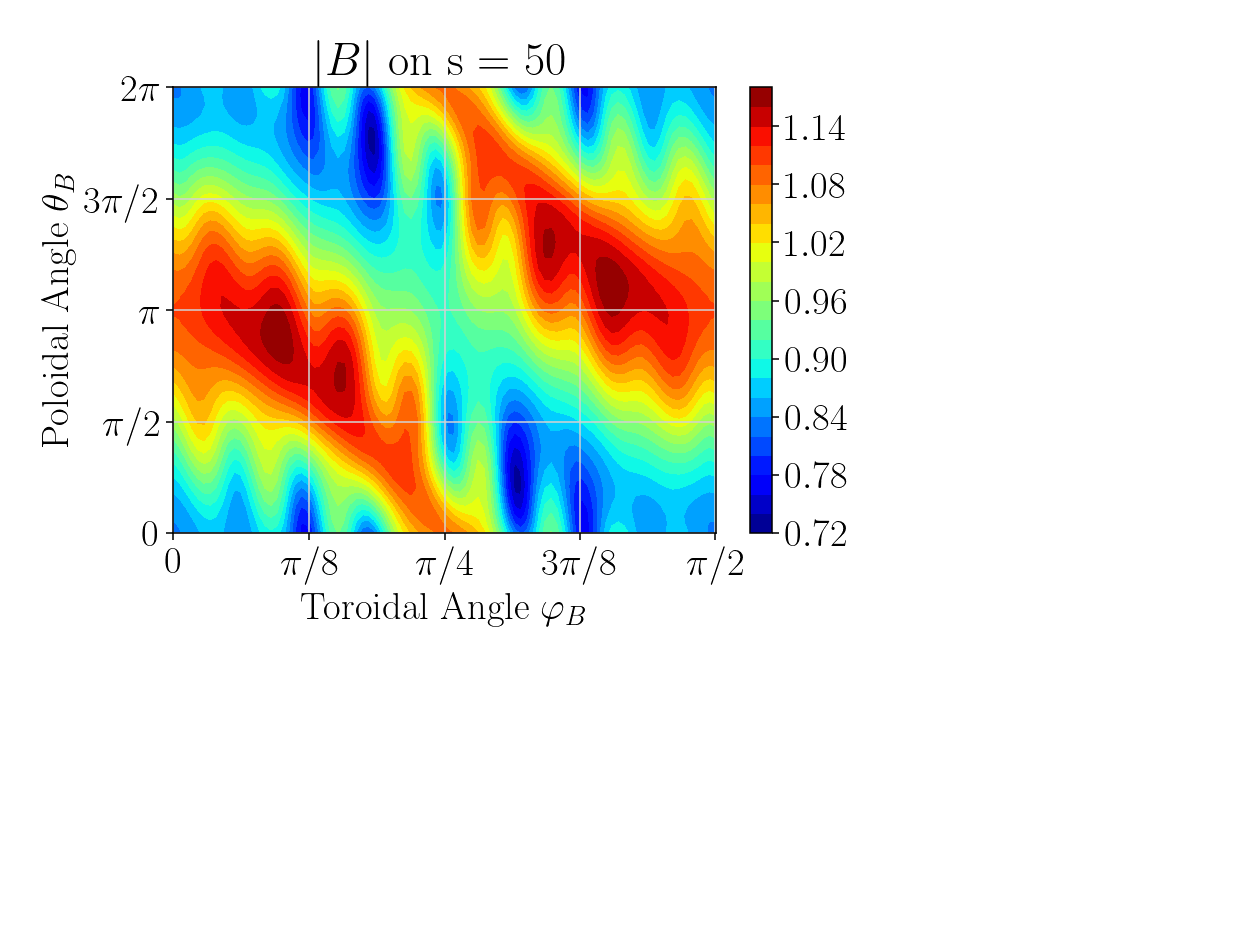

In [7]:
%matplotlib notebook
s = int(b.ns_b/2)
B_plot(b,s,save_file)

<IPython.core.display.Javascript object>


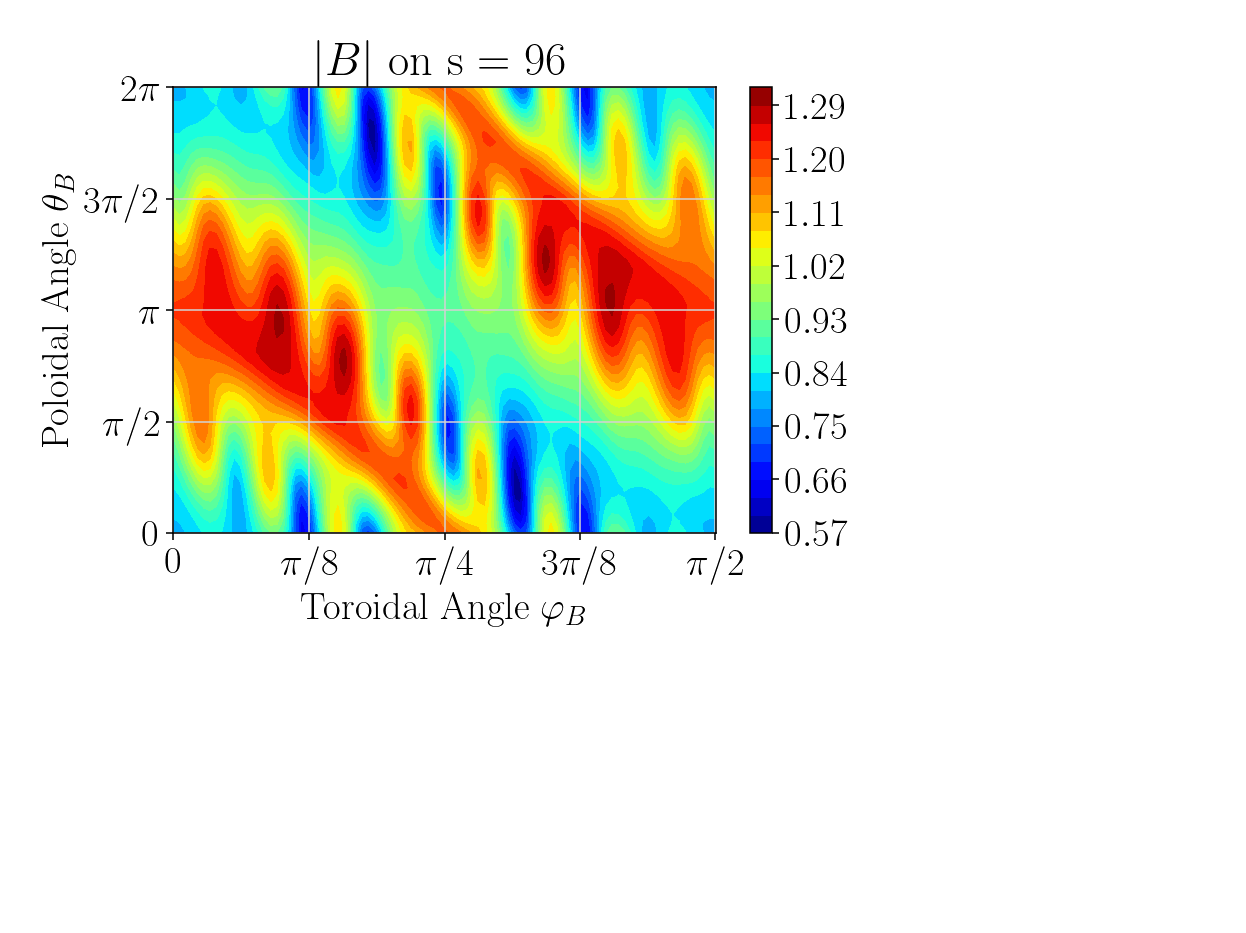

In [6]:
%matplotlib notebook
s = int(b.ns_b -1)
B_plot(b,s,save_file)